#Nama : Bunga Miftahul Barokah
#Email : bungamiftahul.14@gmail.com
#Universitas Negeri Padang


1. SETUP & INSTALASI LIBRARY


In [1]:
!pip install --upgrade pip
!pip install langchain_community
!pip install replicate
!pip install pandas matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.8 MB/s  0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.11
    Uninstalling langchain-text-splitters-0.3.11:
      Successfully uninstalled langchain-text-splitters-0.3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [langch

In [2]:
from langchain_community.llms import Replicate
from google.colab import userdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")


In [3]:
if api_token is None:
    raise ValueError("Token belum diatur di Colab Secrets. Silakan tambahkan 'api_token' terlebih dahulu.")

2. IMPORT DATA & PEMERIKSAAN AWAL

In [4]:
df = pd.read_excel("/content/konsumsi listrik.xlsx")
df.head()

,Provinsi,Tahun,Konsumsi Listrik (Gwh),Jumlah Penduduk (Ribu),PDRB
0,Aceh,2017,2409.11,5189.5,145806.92
1,Sumatera Utara,2017,9671.48,14262.1,684634.43
2,Sumatera Barat,2017,3415.29,5321.5,213893.47
3,Riau,2017,4069.93,6657.9,704705.03
4,Jambi,2017,1176.09,3515.0,189787.72


In [ ]:
# Info Umum Dataset
print("\n Informasi Struktur Data:")
print(df.info())

print("\n Statistik Deskriptif:")
print(df.describe())

print("\n Jumlah Missing Value:")
print(df.isna().sum())


 Informasi Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Provinsi                238 non-null    object 
 1   Tahun                   238 non-null    int64  
 2   Konsumsi Listrik (Gwh)  238 non-null    float64
 3   Jumlah Penduduk (Ribu)  238 non-null    float64
 4   PDRB                    238 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.4+ KB
None

 Statistik Deskriptif:
             Tahun  Konsumsi Listrik (Gwh)  Jumlah Penduduk (Ribu)  \
count   238.000000              238.000000              238.000000   
mean   2020.000000             7453.430882             7950.995798   
std       2.004215            12408.393874            11154.366947   
min    2017.000000              180.590000              691.100000   
25%    2018.000000             1066.960000             21

3. PEMBUATAN VARIABEL TURUNAN (PER KAPITA)

sebagai dasar analisis efisiensi energi antarprovinsi.

In [5]:
# 1. Konsumsi listrik per kapita (kWh per orang)
df['Konsumsi_per_kapita_kWh'] = (df['Konsumsi Listrik (Gwh)'] * 1_000_000) / (df['Jumlah Penduduk (Ribu)'] * 1_000)

# 2. PDRB per kapita (Rp per orang)
df['PDRB_perKapita'] = (df['PDRB'] * 1_000_000) / (df['Jumlah Penduduk (Ribu)'] * 1_000)

df.head(34)


,Provinsi,Tahun,Konsumsi Listrik (Gwh),Jumlah Penduduk (Ribu),PDRB,Konsumsi_per_kapita_kWh,PDRB_perKapita
0,Aceh,2017,2409.11,5189.5,145806.92,464.227768,28096.525677
1,Sumatera Utara,2017,9671.48,14262.1,684634.43,678.124540,48003.760316
2,Sumatera Barat,2017,3415.29,5321.5,213893.47,641.790848,40194.206521
3,Riau,2017,4069.93,6657.9,704705.03,611.293351,105844.940597
4,Jambi,2017,1176.09,3515.0,189787.72,334.591750,53993.661451
5,Sumatera Selatan,2017,5239.35,8267.0,382885.70,633.766784,46314.951010
6,Bengkulu,2017,852.84,1934.3,60657.68,440.903686,31358.982578
7,Lampung,2017,3998.30,8289.6,306700.43,482.327253,36998.218249
8,Kepulauan Bangka Belitung,2017,979.19,1430.9,69865.21,684.317562,48826.060521
9,Kepulauan Riau,2017,2823.17,2082.7,227706.88,1355.533682,109332.539492


4. ANALISIS TREN KONSUMSI LISTRIK NASIONAL

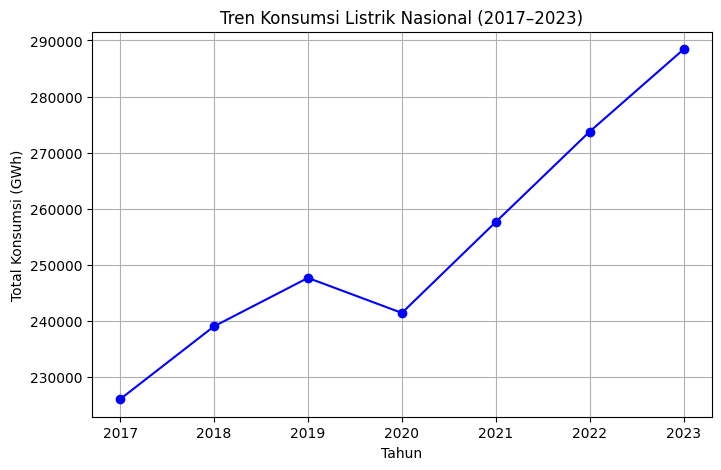

In [ ]:
nasional = df.groupby('Tahun')['Konsumsi Listrik (Gwh)'].sum()
nasional.plot.line(marker='o', color='blue', figsize=(8,5), title='Tren Konsumsi Listrik Nasional (2017–2023)')
plt.xlabel('Tahun')
plt.ylabel('Total Konsumsi (GWh)')
plt.grid(True)
plt.show()

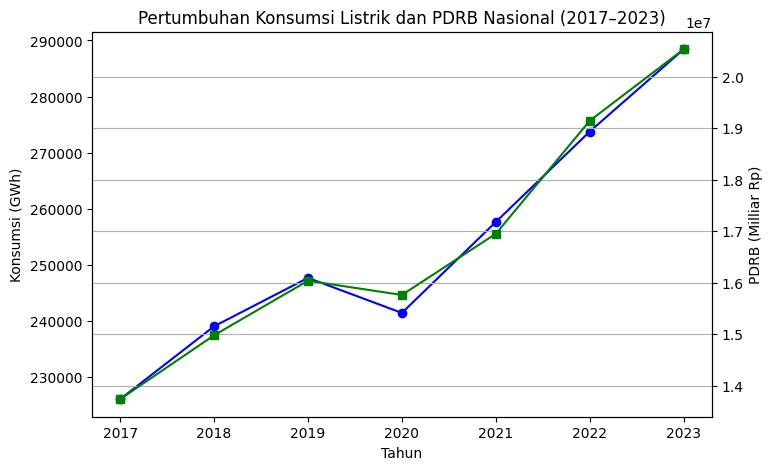

In [ ]:
nasional = df.groupby('Tahun')[['Konsumsi Listrik (Gwh)','PDRB']].sum()
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(nasional.index, nasional['Konsumsi Listrik (Gwh)'], marker='o', color='blue', label='Konsumsi Listrik (GWh)')
ax2 = ax1.twinx()
ax2.plot(nasional.index, nasional['PDRB'], marker='s', color='green', label='PDRB (Juta Rp)')
plt.title('Pertumbuhan Konsumsi Listrik dan PDRB Nasional (2017–2023)')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Konsumsi (GWh)')
ax2.set_ylabel('PDRB (Milliar Rp)')
plt.grid(True)
plt.show()

5. ANALISIS RATA-RATA KONSUMSI DAN PDRB PER KAPITA PROVINSI

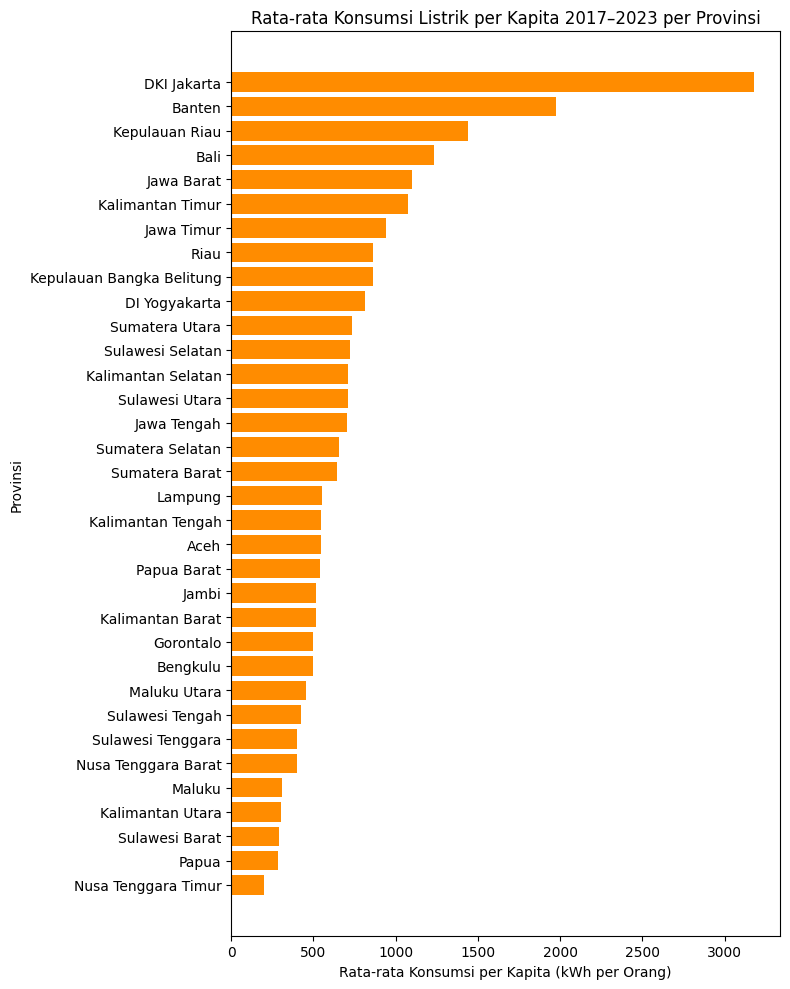

In [ ]:
# Hitung rata-rata konsumsi per kapita per provinsi selama 2017–2023
rata_perkapita = df.groupby('Provinsi')['Konsumsi_per_kapita_kWh'].mean().sort_values(ascending=False)

# Visualisasi hasil rata-rata konsumsi per kapita
plt.figure(figsize=(8,10))
plt.barh(rata_perkapita.index, rata_perkapita.values, color='darkorange')
plt.xlabel('Rata-rata Konsumsi per Kapita (kWh per Orang)')
plt.ylabel('Provinsi')
plt.title('Rata-rata Konsumsi Listrik per Kapita 2017–2023 per Provinsi')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

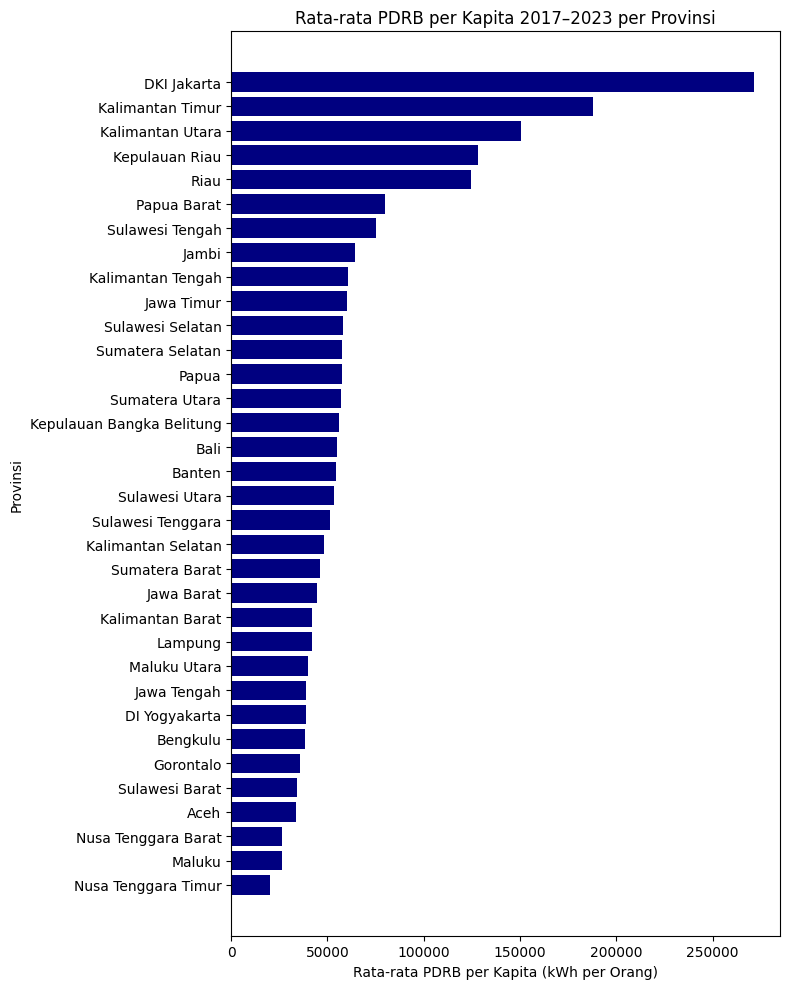

In [ ]:
# Hitung rata-rata konsumsi per kapita per provinsi selama 2017–2023
rata_perkapita = df.groupby('Provinsi')['PDRB_perKapita'].mean().sort_values(ascending=False)

# Visualisasi hasil rata-rata konsumsi per kapita
plt.figure(figsize=(8,10))
plt.barh(rata_perkapita.index, rata_perkapita.values, color='navy')
plt.xlabel('Rata-rata PDRB per Kapita (kWh per Orang)')
plt.ylabel('Provinsi')
plt.title('Rata-rata PDRB per Kapita 2017–2023 per Provinsi')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

6. PERHITUNGAN EFISIENSI ENERGI

In [6]:
df['Efisiensi_Energi'] = df['PDRB_perKapita'] / df['Konsumsi_per_kapita_kWh']
ef = df.groupby('Provinsi')['Efisiensi_Energi'].mean().reset_index()
ef

,Provinsi,Efisiensi_Energi
0,Aceh,61.245483
1,Bali,44.411119
2,Banten,27.412764
3,Bengkulu,76.245262
4,DI Yogyakarta,47.566657
5,DKI Jakarta,85.251995
6,Gorontalo,71.931621
7,Jambi,129.141321
8,Jawa Barat,40.363792
9,Jawa Tengah,55.380725


7. AI CLASSIFICATION – KLASIFIKASI EFISIENSI ENERGI NASIONAL

In [ ]:
# Calculate efficiency and format it
df['Efisiensi_Energi'] = df['PDRB_perKapita'] / df['Konsumsi_per_kapita_kWh']
ef = df.groupby('Provinsi')['Efisiensi_Energi'].mean().reset_index()
teks_ef = ef.to_string(index=False, header=True)

# Buat prompt untuk AI Granite agar melakukan klasifikasi efisiensi energi
prompt_ai_classification = f"""
Anda adalah model AI IBM Granite yang bertugas melakukan klasifikasi efisiensi energi antarprovinsi di Indonesia.

Berikut data rata-rata efisiensi energi (rasio PDRB per kapita dibagi konsumsi listrik per kapita) per provinsi dari tahun 2017–2023:

{teks_ef}

Tugas Anda:
1. Tentukan kategori efisiensi energi untuk setiap provinsi (Efisiensi Rendah / Sedang / Tinggi)
   berdasarkan nilai Efisiensi_Energi.
2. Gunakan pendekatan berbasis interpretasi data yang ada.
3. Berikan hasil dalam format tabel dua kolom:
   | Provinsi | Kategori Efisiensi |
4. Jangan menambahkan penjelasan panjang, cukup hasil tabel klasifikasinya.
"""

# Jalankan prompt ke model IBM Granite
response_ai_classification = llm.invoke(prompt_ai_classification)

# Cetak hasil klasifikasi dari AI
print("=== HASIL KLASIFIKASI EFISIENSI ENERGI (AI GRANITE) ==COc")
print(response_ai_classification)

=== HASIL KLASIFIKASI EFISIENSI ENERGI (AI GRANITE) ==COc
| Provinsi                  | Kategori Efisiensi          |
|---------------------------|----------------------------|
| Aceh                      | Efisiensi Rendah            |
| Bali                      | Efisiensi Rendah            |
| Banten                    | Efisiensi Rendah            |
| Bengkulu                 | Efisiensi Sedang           |
| DI Yogyakarta             | Efisiensi Sedang           |
| DKI Jakarta               | Efisiensi Tinggi          |
| Gorontalo                 | Efisiensi Sedang           |
| Jambi                     | Efisiensi Tinggi          |
| Jawa Barat                | Efisiensi Rendah            |
| Jawa Tengah               | Efisiensi Sedang           |
| Jawa Timur                | Efisiensi Sedang           |
| Kalimantan Barat          | Efisiensi Tinggi          |
| Kalimantan Selatan        | Efisiensi Sedang           |
| Kalimantan Tengah         | Efisiensi Tinggi          

8. KLASIFIKASI EFISIENSI ENERGI BERBASIS KUANTIL

In [ ]:
# === BLOK KLASIFIKASI EFISIENSI ENERGI NASIONAL (AI GRANITE / IBM) ===
import pandas as pd

# Hitung efisiensi energi: seberapa besar nilai ekonomi per 1 kWh listrik
df['Efisiensi_Energi'] = df['PDRB_perKapita'] / df['Konsumsi_per_kapita_kWh']

# Hitung batas kuantil untuk klasifikasi otomatis (rendah, sedang, tinggi)
q1 = df['Efisiensi_Energi'].quantile(0.33)
q2 = df['Efisiensi_Energi'].quantile(0.66)

# Fungsi klasifikasi berdasarkan efisiensi energi
def kategori_efisiensi(x):
    if x <= q1:
        return 'Efisiensi Rendah'
    elif x <= q2:
        return 'Efisiensi Sedang'
    else:
        return 'Efisiensi Tinggi'

# Terapkan fungsi ke dataframe
df['Kategori_Efisiensi'] = df['Efisiensi_Energi'].apply(kategori_efisiensi)

# Buat tabel ringkasan provinsi dan kategorinya
tabel_efisiensi = df.groupby('Provinsi', as_index=False)['Efisiensi_Energi'].mean()
tabel_efisiensi['Kategori_Efisiensi'] = tabel_efisiensi['Efisiensi_Energi'].apply(kategori_efisiensi)

# Tampilkan hasil dalam format tabel Markdown
print("=== HASIL KLASIFIKASI PROVINSI BERDASARKAN EFISIENSI ENERGI ===")
print(tabel_efisiensi[['Provinsi', 'Kategori_Efisiensi']].to_markdown(index=False))

=== HASIL KLASIFIKASI PROVINSI BERDASARKAN EFISIENSI ENERGI ===
| Provinsi                  | Kategori_Efisiensi   |
|:--------------------------|:---------------------|
| Aceh                      | Efisiensi Rendah     |
| Bali                      | Efisiensi Rendah     |
| Banten                    | Efisiensi Rendah     |
| Bengkulu                  | Efisiensi Sedang     |
| DI Yogyakarta             | Efisiensi Rendah     |
| DKI Jakarta               | Efisiensi Sedang     |
| Gorontalo                 | Efisiensi Sedang     |
| Jambi                     | Efisiensi Tinggi     |
| Jawa Barat                | Efisiensi Rendah     |
| Jawa Tengah               | Efisiensi Rendah     |
| Jawa Timur                | Efisiensi Rendah     |
| Kalimantan Barat          | Efisiensi Sedang     |
| Kalimantan Selatan        | Efisiensi Rendah     |
| Kalimantan Tengah         | Efisiensi Tinggi     |
| Kalimantan Timur          | Efisiensi Tinggi     |
| Kalimantan Utara          | Efisi

9. PERBANDINGAN HASIL KLASIFIKASI AI VS STATISTIK

In [ ]:
# Execute cell caQHqbNbRKWl to get AI classification
# response_ai_classification = llm.invoke(prompt_ai_classification)
# print("=== HASIL KLASIFIKASI EFISIENSI ENERGI (AI GRANITE) ===")
# print(response_ai_classification)

# Execute cell Pz7tnAKD_Ev4 to get quantile-based classification
# import pandas as pd
# df['Efisiensi_Energi'] = df['PDRB_perKapita'] / df['Konsumsi_per_kapita_kWh']
# q1 = df['Efisiensi_Energi'].quantile(0.33)
# q2 = df['Efisiensi_Energi'].quantile(0.66)
# def kategori_efisiensi(x):
#     if x <= q1:
#         return 'Efisiensi Rendah'
#     elif x <= q2:
#         return 'Efisiensi Sedang'
#     else:
#         return 'Efisiensi Tinggi'
# df['Kategori_Efisiensi'] = df['Efisiensi_Energi'].apply(kategori_efisiensi)
# tabel_efisiensi = df.groupby('Provinsi', as_index=False)['Efisiensi_Energi'].mean()
# tabel_efisiensi['Kategori_Efisiensi'] = tabel_efisiensi['Efisiensi_Energi'].apply(kategori_efisiensi)
# print("=== HASIL KLASIFIKASI PROVINSI BERDASARKAN EFISIENSI ENERGI ===")
# print(tabel_efisiensi[['Provinsi', 'Kategori_Efisiensi']].to_markdown(index=False))


# Combine the results for comparison
import io
import pandas as pd

# Parse AI classification result (assuming it's in markdown table format)
ai_classification_text = response_ai_classification.strip()
ai_df = pd.read_csv(io.StringIO(ai_classification_text), sep='|', skipinitialspace=True)
ai_df.columns = [col.strip() for col in ai_df.columns]
ai_df = ai_df.iloc[1:].dropna(axis=1, how='all') # remove separator line and empty columns
ai_df.columns = ['Provinsi', 'Kategori Efisiensi (AI)']
ai_df['Provinsi'] = ai_df['Provinsi'].str.strip()
ai_df['Kategori Efisiensi (AI)'] = ai_df['Kategori Efisiensi (AI)'].str.strip()


# Parse quantile-based classification result (assuming it's in markdown table format)
quantile_classification_text = tabel_efisiensi[['Provinsi', 'Kategori_Efisiensi']].to_markdown(index=False)

# Use io.StringIO to read the markdown table directly
quantile_df = pd.read_csv(io.StringIO(quantile_classification_text), sep='|', skipinitialspace=True)

# Clean up column names and data
quantile_df.columns = [col.strip() for col in quantile_df.columns]
quantile_df = quantile_df.iloc[1:].dropna(axis=1, how='all') # remove separator line and empty columns
quantile_df.columns = ['Provinsi', 'Kategori Efisiensi (Quantile)']
quantile_df['Provinsi'] = quantile_df['Provinsi'].str.strip()
quantile_df['Kategori Efisiensi (Quantile)'] = quantile_df['Kategori Efisiensi (Quantile)'].str.strip()

# Merge the two dataframes
comparison_df = pd.merge(ai_df, quantile_df, on='Provinsi', how='left')

print("=== Comparison of AI vs Quantile Classification ===")
display(comparison_df)

=== Comparison of AI vs Quantile Classification ===


,Provinsi,Kategori Efisiensi (AI),Kategori Efisiensi (Quantile)
0,Aceh,Efisiensi Rendah,Efisiensi Rendah
1,Bali,Efisiensi Rendah,Efisiensi Rendah
2,Banten,Efisiensi Rendah,Efisiensi Rendah
3,Bengkulu,Efisiensi Sedang,Efisiensi Sedang
4,DI Yogyakarta,Efisiensi Sedang,Efisiensi Rendah
5,DKI Jakarta,Efisiensi Tinggi,Efisiensi Sedang
6,Gorontalo,Efisiensi Sedang,Efisiensi Sedang
7,Jambi,Efisiensi Tinggi,Efisiensi Tinggi
8,Jawa Barat,Efisiensi Rendah,Efisiensi Rendah
9,Jawa Tengah,Efisiensi Sedang,Efisiensi Rendah


Untuk melihat konsistensi hasil, dilakukan analisis klasifikasi menggunakan model AI Granite dan berdasarkan kuantil.
Berdasarkan hasil perbandingan:
1. AI Granite menghasilkan klasifikasi yang secara umum sejalan dengan metode statistik kuantil, meskipun terdapat beberapa perbedaan kecil antarprovinsi.
2. Perbedaan ini wajar karena AI Granite menggunakan pendekatan interpretatif berbasis pola, sedangkan metode kuantil bersifat matematis murni (berdasarkan pembagian nilai data).
3. Secara keseluruhan, kesamaan kategori mayoritas menunjukkan bahwa model AI dapat memberikan hasil yang cukup konsisten dengan analisis kuantitatif tradisional.
Oleh karena itu, analisis lanjutan dan interpretasi kebijakan pada penelitian ini tetap menggunakan hasil klasifikasi kuantil sebagai acuan utama.

10. INSIGHT DAN REKOMENDASI KEBIJAKAN NASIONAL (EFISIENSI)

In [ ]:
# Ringkasan hasil
teks_ringkas_perkapita = """
| Provinsi                  | Kategori_Efisiensi   |
|:--------------------------|:---------------------|
| Aceh                      | Efisiensi Rendah     |
| Bali                      | Efisiensi Rendah     |
| Banten                    | Efisiensi Rendah     |
| Bengkulu                  | Efisiensi Sedang     |
| DI Yogyakarta             | Efisiensi Rendah     |
| DKI Jakarta               | Efisiensi Sedang     |
| Gorontalo                 | Efisiensi Sedang     |
| Jambi                     | Efisiensi Tinggi     |
| Jawa Barat                | Efisiensi Rendah     |
| Jawa Tengah               | Efisiensi Rendah     |
| Jawa Timur                | Efisiensi Rendah     |
| Kalimantan Barat          | Efisiensi Sedang     |
| Kalimantan Selatan        | Efisiensi Rendah     |
| Kalimantan Tengah         | Efisiensi Tinggi     |
| Kalimantan Timur          | Efisiensi Tinggi     |
| Kalimantan Utara          | Efisiensi Tinggi     |
| Kepulauan Bangka Belitung | Efisiensi Rendah     |
| Kepulauan Riau            | Efisiensi Tinggi     |
| Lampung                   | Efisiensi Sedang     |
| Maluku                    | Efisiensi Sedang     |
| Maluku Utara              | Efisiensi Sedang     |
| Nusa Tenggara Barat       | Efisiensi Rendah     |
| Nusa Tenggara Timur       | Efisiensi Tinggi     |
| Papua                     | Efisiensi Tinggi     |
| Papua Barat               | Efisiensi Tinggi     |
| Riau                      | Efisiensi Tinggi     |
| Sulawesi Barat            | Efisiensi Tinggi     |
| Sulawesi Selatan          | Efisiensi Sedang     |
| Sulawesi Tengah           | Efisiensi Tinggi     |
| Sulawesi Tenggara         | Efisiensi Tinggi     |
| Sulawesi Utara            | Efisiensi Sedang     |
| Sumatera Barat            | Efisiensi Sedang     |
| Sumatera Selatan          | Efisiensi Sedang     |
| Sumatera Utara            | Efisiensi Sedang     |
"""

prompt_ai_ibm = f"""
Anda adalah analis kebijakan energi di PLN Pusat dan Kementerian ESDM.
Berdasarkan hasil analisis klasifikasi efisensi energi berikut:

{teks_ringkas_perkapita}

Berikan analisis strategis berbasis data yang mencakup:
bagaimana Pola umum hubungan efisiensi energi dengan tingkat ekonomi wilayah
Gunakan gaya bahasa formal, objektif, dan jangan mengulangi hasil ringkasan saya langsung jawab saja pertanyaannya.
"""

response_ai_ibm = llm.invoke(prompt_ai_ibm)
print("=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===")
print(response_ai_ibm)


=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===
Based on the provided energy efficiency classification data for Indonesian provinces, the following strategic analysis can be derived:

1. Correlation with Economic Status: There is no clear inverse relationship between energy efficiency and the economic status of the provinces. Provinces with higher energy efficiency (Sedang and Tinggi categories) are not exclusively those with higher economic status, as evidenced by the presence of economically developed regions like Jakarta (DKI Jakarta) and economically diverse regions like Java (Jawa Barat, Jawa Tengah, Jawa Timur) falling under the Rendah category.

2. Regional Disparities: Energy efficiency varies significantly across provinces, with some economically less-developed regions (Rendah category) like Aceh, Bali, Banten, DI Yogyakarta, Nusa Tenggara Barat, and Jawa demonstrating low energy efficiency. Meanwhile, economically diverse regions like Kalimantan, Sulawesi, and Papua exhibit 

In [ ]:
# === BLOK AI GRANITE: INSIGHT DAN REKOMENDASI KEBIJAKAN NASIONAL ===

# Ringkasan hasil
teks_ringkas_pola = """
Based on the provided energy efficiency classification data for Indonesian provinces, the following strategic analysis can be derived:
1. Correlation with Economic Status: There is no clear inverse relationship between energy efficiency and the economic status of the provinces. Provinces with higher energy efficiency (Sedang and Tinggi categories) are not exclusively those with higher economic status, as evidenced by the presence of economically developed regions like Jakarta (DKI Jakarta) and economically diverse regions like Java (Jawa Barat, Jawa Tengah, Jawa Timur) falling under the Rendah category.
2. Regional Disparities: Energy efficiency varies significantly across provinces, with some economically less-developed regions (Rendah category) like Aceh, Bali, Banten, DI Yogyakarta, Nusa Tenggara Barat, and Jawa demonstrating low energy efficiency. Meanwhile, economically diverse regions like Kalimantan, Sulawesi, and Papua exhibit varying energy efficiency levels, ranging from Sedang to Tinggi categories.
3. Focus on Energy Efficiency Improvement: Provinces with higher energy efficiency (Sedang and Tinggi categories) such as Bengkulu, Lampung, Maluku, and Sumatera provinces might serve as case studies for other regions to improve their energy efficiency. Conversely, provinces with consistently low energy efficiency (Rendah category) like Aceh, Bali, Banten, DI Yogyakarta, Nusa Tenggara Barat, and Jawa warrant targeted interventions to enhance their energy efficiency.
4. Targeted Policy Interventions: Policymakers should consider implementing targeted policies to address the disparities in energy efficiency across provinces. This may involve incentivizing energy-efficient technologies and practices in provinces with low energy efficiency, while simultaneously supporting the sustained improvement of energy efficiency in provinces already demonstrating higher efficiency levels.
5. Cross-Provincial Collaboration: Encouraging collaboration among provinces with varying levels of energy efficiency could foster knowledge exchange and best practice sharing, ultimately contributing to an overall improvement in energy efficiency across Indonesia.

"""
prompt_ai_ibm = f"""
Anda adalah analis kebijakan energi di PLN Pusat dan Kementerian ESDM.
Berdasarkan hasil analisis Pola umum hubungan efisiensi energi dengan tingkat ekonomi wilayah energi berikut:

{teks_ringkas_pola}

Apa kesimpulan dan Implikasi kebijakan yang dapat dilakukan untuk meningkatkan efisiensi energi nasional.

"""

response_ai_ibm = llm.invoke(prompt_ai_ibm)
print("=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===")
print(response_ai_ibm)


=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===
Based on the analysis, the key conclusions are:

1. There is no direct correlation between a province's economic status and its energy efficiency. High energy efficiency can be found in both economically developed and diverse regions.
2. Significant regional disparities exist in energy efficiency, with some economically less-developed provinces having low energy efficiency, while others with varying economic statuses show a range of efficiency levels.
3. Provinces with higher energy efficiency can serve as case studies for improvement, while those with consistently low efficiency require targeted interventions.

Policy implications to enhance national energy efficiency include:

1. Implementing targeted policies: Incentivize energy-efficient technologies and practices in provinces with low energy efficiency, while supporting sustained improvement in provinces with higher efficiency.
2. Cross-provincial collaboration: Encourage knowledge 

11. ANALISIS TOTAL KONSUMSI

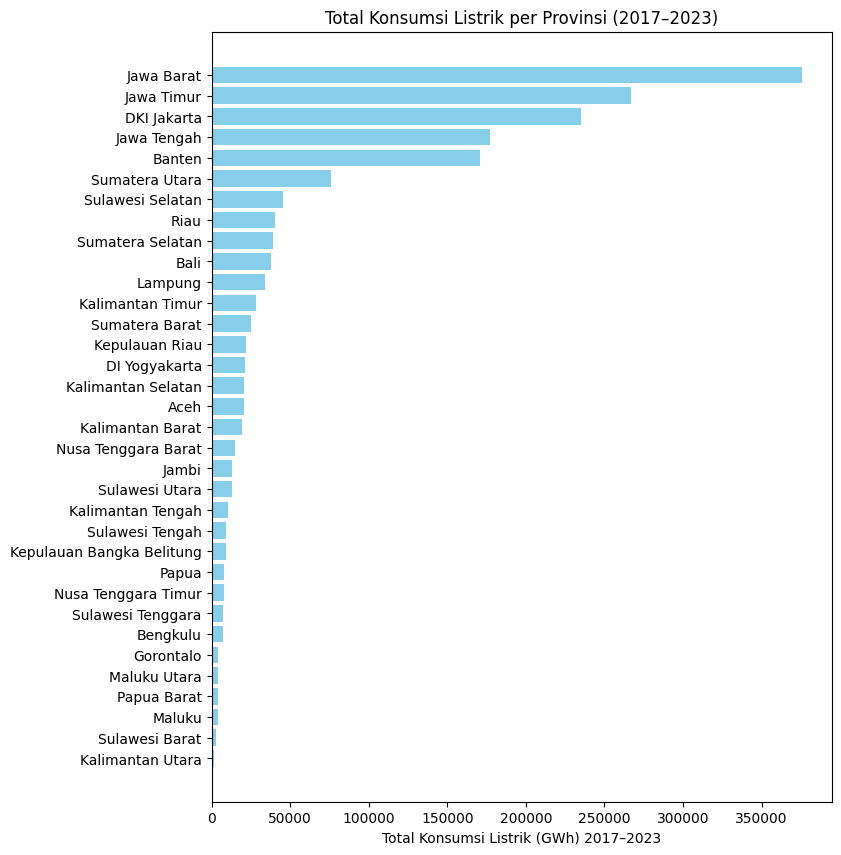

In [ ]:
# Hitung total konsumsi listrik per provinsi dari 2017–2023
total_konsumsi = df.groupby('Provinsi')['Konsumsi Listrik (Gwh)'].sum().sort_values(ascending=False)

# Plot bar chart horizontal
plt.figure(figsize=(8, 10))
plt.barh(total_konsumsi.index, total_konsumsi.values, color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Total Konsumsi Listrik (GWh) 2017–2023')
plt.title('Total Konsumsi Listrik per Provinsi (2017–2023)')
plt.show()

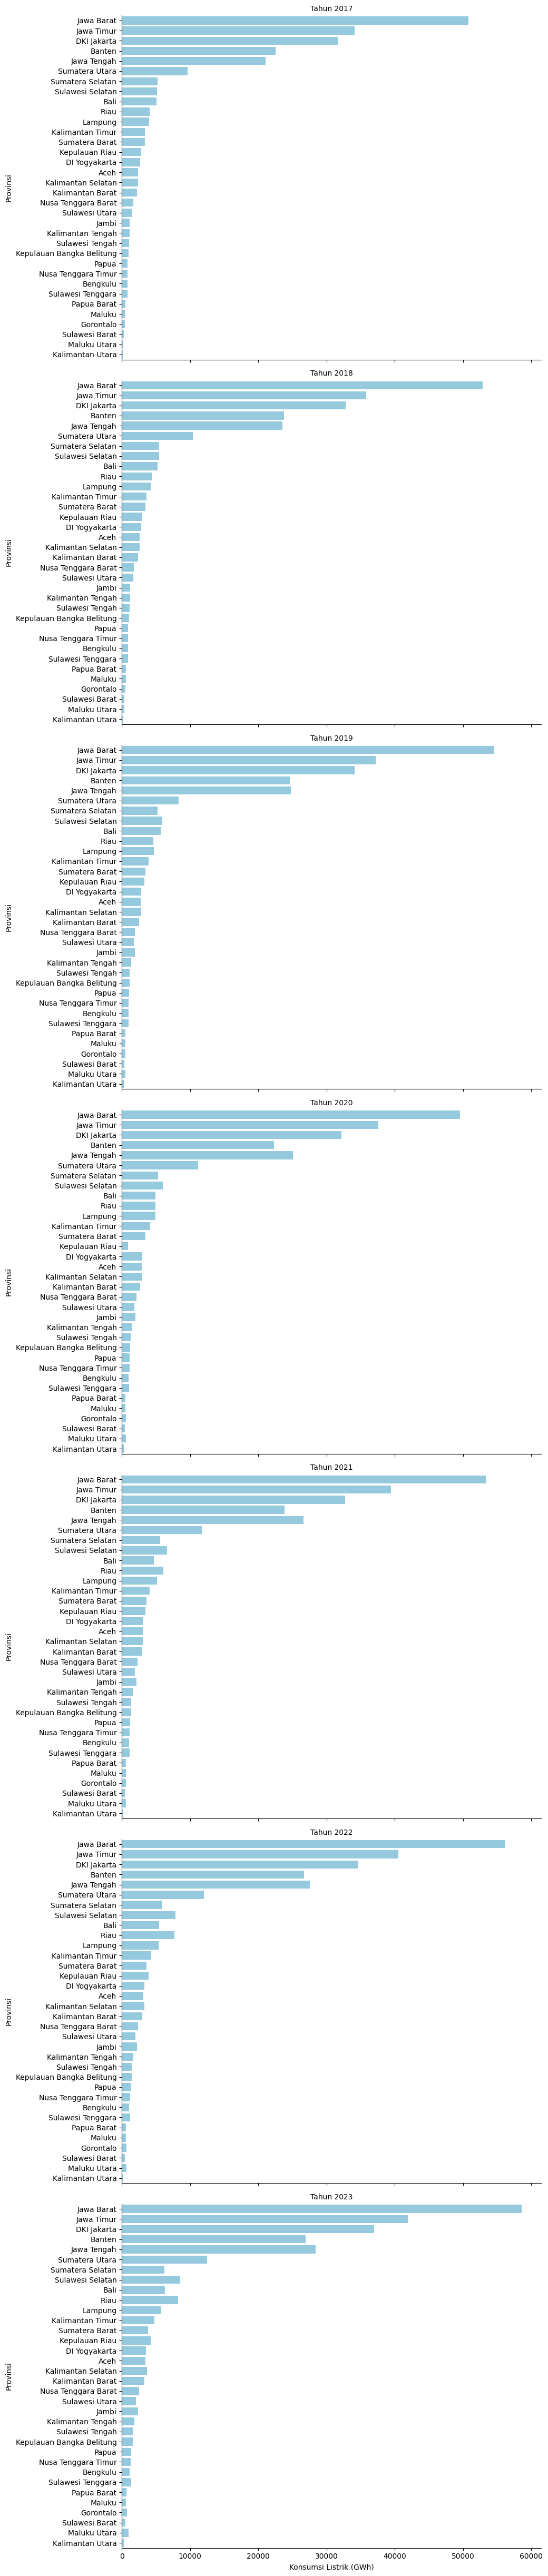

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# set warna global
sns.set_palette(["skyblue"])

# buat fungsi plotting (tanpa color)
def plot_sorted_bar(data, **kwargs):
    data_sorted = data.sort_values('Konsumsi Listrik (Gwh)', ascending=False)
    sns.barplot(
        data=data_sorted,
        y='Provinsi',
        x='Konsumsi Listrik (Gwh)',
        **kwargs
    )

# buat grid 1 kolom biar label provinsi terlihat jelas
g = sns.FacetGrid(df, col='Tahun', col_wrap=1, height=7, aspect=1.5)
g.map_dataframe(plot_sorted_bar)
g.set_titles("Tahun {col_name}")
g.set_axis_labels("Konsumsi Listrik (GWh)", "Provinsi")

plt.tight_layout()
plt.show()


12. ANALISIS REGIONAL – PERBANDINGAN KONSUMSI LISTRIK ANTAR PULAU

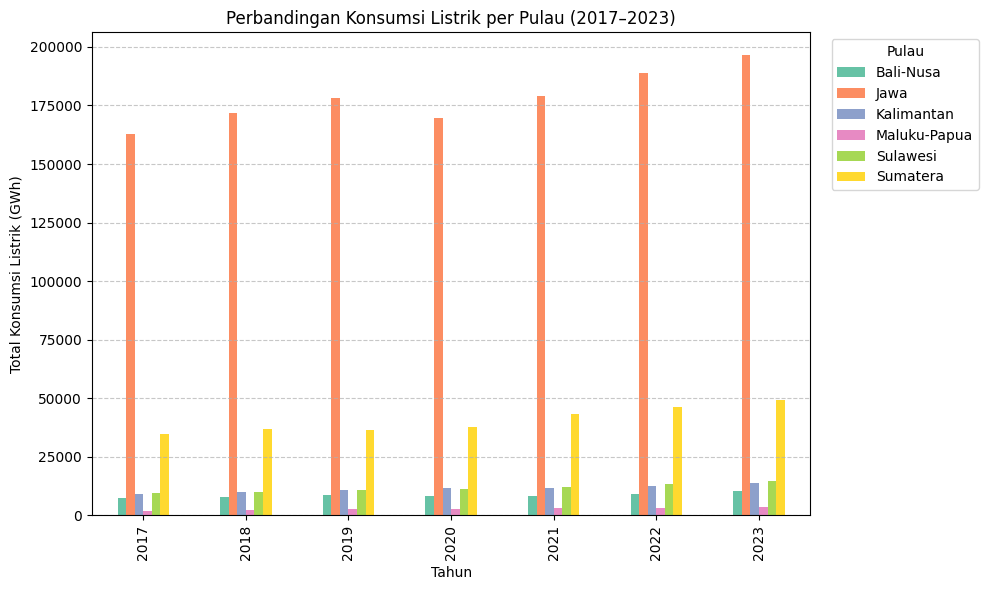

In [ ]:
# --- Mapping Provinsi ke Pulau ---
pulau_map = {
    'Aceh':'Sumatera','Sumatera Utara':'Sumatera','Sumatera Barat':'Sumatera','Riau':'Sumatera',
    'Jambi':'Sumatera','Sumatera Selatan':'Sumatera','Bengkulu':'Sumatera','Lampung':'Sumatera',
    'Kepulauan Bangka Belitung':'Sumatera','Kepulauan Riau':'Sumatera',
    'DKI Jakarta':'Jawa','Jawa Barat':'Jawa','Jawa Tengah':'Jawa','DI Yogyakarta':'Jawa','Jawa Timur':'Jawa','Banten':'Jawa',
    'Bali':'Bali-Nusa','Nusa Tenggara Barat':'Bali-Nusa','Nusa Tenggara Timur':'Bali-Nusa',
    'Kalimantan Barat':'Kalimantan','Kalimantan Tengah':'Kalimantan','Kalimantan Selatan':'Kalimantan',
    'Kalimantan Timur':'Kalimantan','Kalimantan Utara':'Kalimantan',
    'Sulawesi Utara':'Sulawesi','Sulawesi Tengah':'Sulawesi','Sulawesi Selatan':'Sulawesi',
    'Sulawesi Tenggara':'Sulawesi','Gorontalo':'Sulawesi','Sulawesi Barat':'Sulawesi',
    'Maluku':'Maluku-Papua','Maluku Utara':'Maluku-Papua','Papua Barat':'Maluku-Papua','Papua':'Maluku-Papua'
}

# --- Tambahkan kolom Pulau ke dataset ---
df['Pulau'] = df['Provinsi'].map(pulau_map)

# --- Hitung total konsumsi listrik per pulau per tahun ---
pulau_tahun = df.groupby(['Pulau', 'Tahun'])['Konsumsi Listrik (Gwh)'].sum().reset_index()

# --- Pivot agar tiap pulau jadi bar dengan warna berbeda per tahun ---
pivot_pulau = pulau_tahun.pivot(index='Tahun', columns='Pulau', values='Konsumsi Listrik (Gwh)')

# --- Plot Grouped Bar Chart dengan warna berbeda ---
import seaborn as sns
colors = sns.color_palette("Set2", n_colors=len(pivot_pulau.columns))

pivot_pulau.plot(kind='bar', figsize=(10,6), color=colors)
plt.title('Perbandingan Konsumsi Listrik per Pulau (2017–2023)')
plt.xlabel('Tahun')
plt.ylabel('Total Konsumsi Listrik (GWh)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Pulau', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


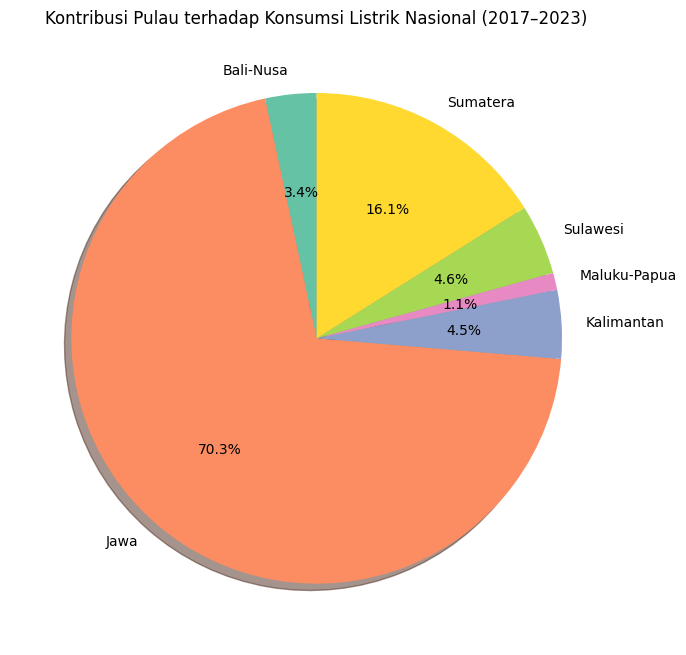

In [ ]:
# --- Hitung total konsumsi listrik per pulau selama 2017–2023 ---
pulau_total = df.groupby('Pulau')['Konsumsi Listrik (Gwh)'].sum()

# --- Palet warna biar beda tiap pulau ---
import seaborn as sns
colors = sns.color_palette("Set2", n_colors=len(pulau_total))

# --- Plot pie chart agregat dengan warna ---
pulau_total.plot.pie(
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    figsize=(7,7),
    title='Kontribusi Pulau terhadap Konsumsi Listrik Nasional (2017–2023)'
)
plt.ylabel('')
plt.tight_layout()
plt.show()


13. Analisis Hubungan PDRB & Penduduk terhadap Konsumsi Listri

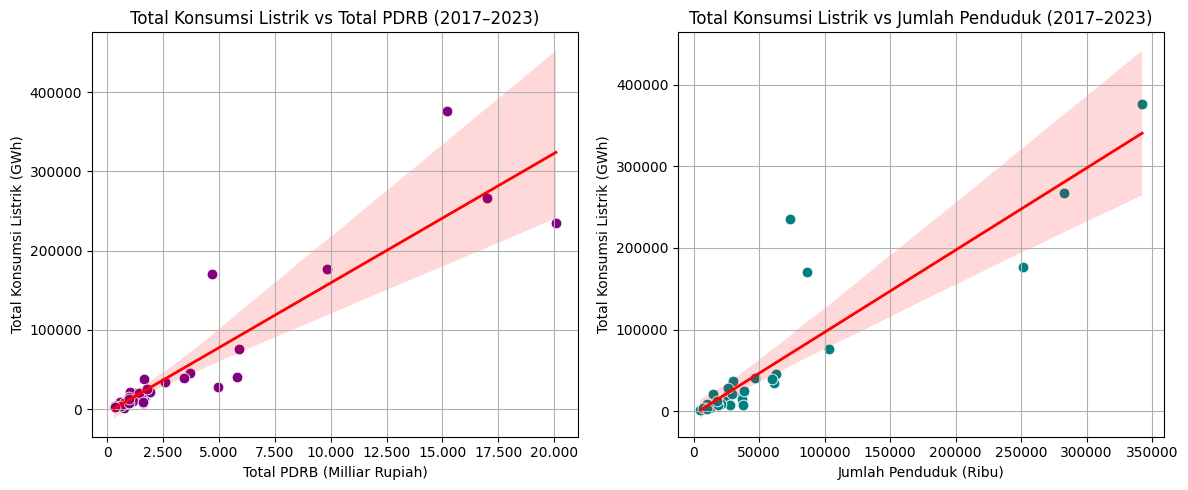

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter

# --- Gabung data total ---
df_total1 = df.groupby('Provinsi')[['PDRB', 'Konsumsi Listrik (Gwh)']].sum().reset_index()
df_total2 = df.groupby('Provinsi')[['Jumlah Penduduk (Ribu)', 'Konsumsi Listrik (Gwh)']].sum().reset_index()

# --- Fungsi formatter agar angka besar di sumbu X tidak pakai notasi ilmiah ---
def ribuan(x, pos):
    return f'{int(x/1e3):,}'.replace(',', '.')  # tampilkan dalam ribuan juta (triliun)

# --- Siapkan figure ---
plt.figure(figsize=(12, 5))

# === Plot 1: PDRB vs Konsumsi ===
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_total1,
    x='PDRB',
    y='Konsumsi Listrik (Gwh)',
    color='purple',
    s=60
)
sns.regplot(
    data=df_total1,
    x='PDRB',
    y='Konsumsi Listrik (Gwh)',
    scatter=False,
    color='red',
    line_kws={'lw': 2}
)
plt.title('Total Konsumsi Listrik vs Total PDRB (2017–2023)')
plt.xlabel('Total PDRB (Milliar Rupiah)')
plt.ylabel('Total Konsumsi Listrik (GWh)')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(ribuan))  # ubah format angka sumbu X

# === Plot 2: Jumlah Penduduk vs Konsumsi ===
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_total2,
    x='Jumlah Penduduk (Ribu)',
    y='Konsumsi Listrik (Gwh)',
    color='teal',
    s=60
)
sns.regplot(
    data=df_total2,
    x='Jumlah Penduduk (Ribu)',
    y='Konsumsi Listrik (Gwh)',
    scatter=False,
    color='red',
    line_kws={'lw': 2}
)
plt.title('Total Konsumsi Listrik vs Jumlah Penduduk (2017–2023)')
plt.xlabel('Jumlah Penduduk (Ribu)')
plt.ylabel('Total Konsumsi Listrik (GWh)')
plt.grid(True)

plt.tight_layout()
plt.show()


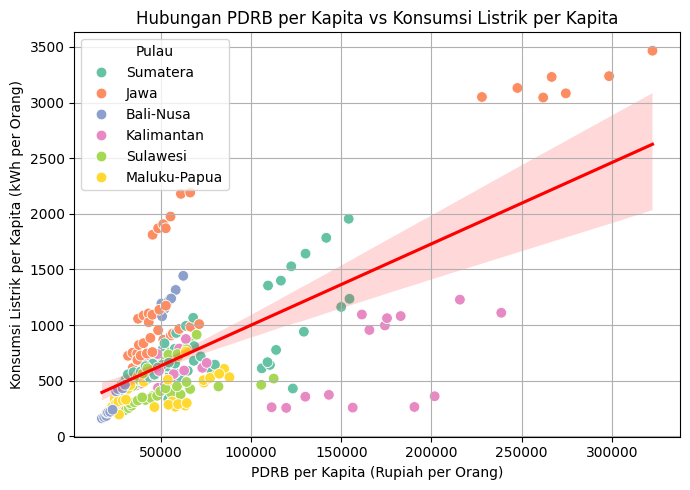

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='PDRB_perKapita',
    y='Konsumsi_per_kapita_kWh',
    hue='Pulau',
    palette='Set2',
    s=60
)
sns.regplot(
    data=df,
    x='PDRB_perKapita',
    y='Konsumsi_per_kapita_kWh',
    scatter=False,
    color='red'
)
plt.title('Hubungan PDRB per Kapita vs Konsumsi Listrik per Kapita')
plt.xlabel('PDRB per Kapita (Rupiah per Orang)')
plt.ylabel('Konsumsi Listrik per Kapita (kWh per Orang)')
plt.grid(True)
plt.tight_layout()
plt.show()


14. ANALISIS KORELASI ANTARVARIABEL

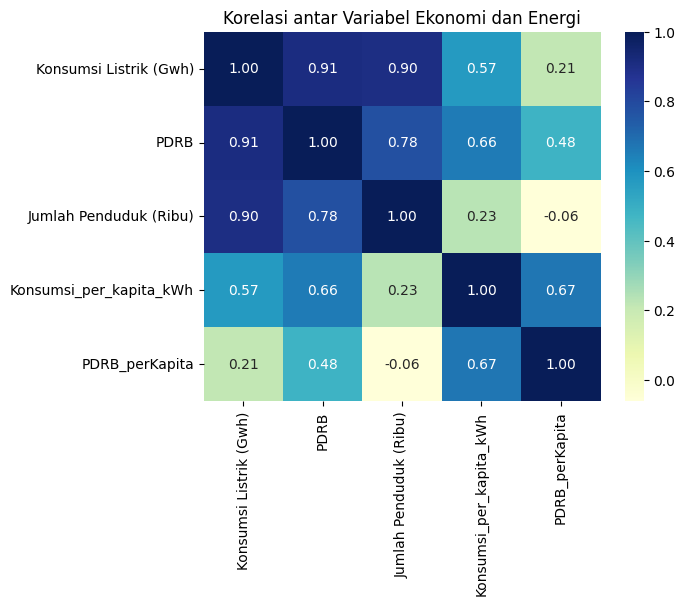

In [ ]:
corr = df[['Konsumsi Listrik (Gwh)', 'PDRB', 'Jumlah Penduduk (Ribu)', 'Konsumsi_per_kapita_kWh','PDRB_perKapita']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Korelasi antar Variabel Ekonomi dan Energi')
plt.show()

15. AI GRANITE – INSIGHT VISUALISASI NASIONAL

In [ ]:
# === BLOK AI GRANITE: INSIGHT DAN REKOMENDASI KEBIJAKAN NASIONAL ===

# Ringkasan hasil keseluruhan analisis visualisasi
teks_ringkas_visualisasi = """
Selama periode 2017–2023, konsumsi listrik nasional menunjukkan tren meningkat secara konsisten.
Pertumbuhan konsumsi listrik sejalan dengan peningkatan PDRB dan jumlah penduduk di Indonesia.

Pulau Jawa mendominasi konsumsi listrik nasional dengan kontribusi lebih dari 70%,
disusul Sumatera sekitar 16% dan Kalimantan 4–5%.
Pulau-pulau lain seperti Sulawesi, Bali–Nusa, dan Maluku–Papua memiliki konsumsi jauh lebih kecil.

Provinsi-provinsi dengan tingkat ekonomi dan urbanisasi tinggi (DKI Jakarta, Banten, Kepulauan riau)
menunjukkan konsumsi per kapita yang jauh lebih tinggi dibandingkan wilayah timur Indonesia.

Hasil scatter plot dan heatmap memperlihatkan:
- Korelasi kuat antara konsumsi listrik dengan PDRB (r = 0.91)
- Korelasi kuat dengan jumlah penduduk (r = 0.90)
- Korelasi sedang antara PDRB per kapita dan konsumsi listrik per kapita (r = 0.57)

Artinya, pertumbuhan ekonomi dan jumlah penduduk adalah faktor utama peningkatan konsumsi listrik,
namun ketimpangan antarwilayah masih cukup besar, terutama antara Jawa dan luar Jawa.
"""

prompt_ai_ibm = f"""
Anda adalah analis kebijakan energi di PLN Pusat dan Kementerian ESDM.
Berdasarkan hasil analisis visualisasi konsumsi listrik nasional tahun 2017–2023 berikut:

{teks_ringkas_visualisasi}

Berikan analisis strategis berbasis data yang mencakup:
1. Ringkasan pola konsumsi energi nasional.
2. Faktor utama yang memengaruhi pertumbuhan konsumsi listrik.
3. Dampak kesenjangan antarwilayah terhadap ketahanan energi nasional.

Gunakan gaya bahasa formal, objektif, dan berorientasi kebijakan publik nasional dan jangan mengulangi hasil ringkasan saya langsung jawab saja pertanyaannya.
"""

response_ai_ibm = llm.invoke(prompt_ai_ibm)
print("=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===")
print(response_ai_ibm)


=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===
1. Ringkasan pola konsumsi energi nasional: The national electricity consumption pattern from 2017 to 2023 indicates a consistent upward trend. Java Island dominates national electricity consumption, contributing over 70%, followed by Sumatra with approximately 16% and Kalimantan with 4-5%. Other islands such as Sulawesi, Bali-Nusa, and Maluku-Papua have significantly lower consumption. High-economy and urbanization provinces like DKI Jakarta, Banten, and Kepulauan Riau exhibit much higher per capita consumption compared to eastern Indonesian regions.

2. Faktor utama yang memengaruhi pertumbuhan konsumsi listrik: The primary factors influencing the growth of electricity consumption are economic development and population increase, as evidenced by strong correlations (r = 0.91 with PDRB and r = 0.90 with total population). Additionally, there is a moderate correlation (r = 0.57) between per capita PDRB and per capita electricity consumpt

16. AI GRANITE: INSIGHT DAN REKOMENDASI KEBIJAKAN NASIONAL


In [ ]:
# Ringkasan hasil keseluruhan analisis visualisasi
teks_kesimpulan_visualisasi = """
=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===
1. Ringkasan pola konsumsi energi nasional: The national electricity consumption pattern from 2017 to 2023 indicates a consistent upward trend. Java Island dominates national electricity consumption, contributing over 70%, followed by Sumatra with approximately 16% and Kalimantan with 4-5%. Other islands such as Sulawesi, Bali-Nusa, and Maluku-Papua have significantly lower consumption. High-economy and urbanization provinces like DKI Jakarta, Banten, and Kepulauan Riau exhibit much higher per capita consumption compared to eastern Indonesian regions.
2. Faktor utama yang memengaruhi pertumbuhan konsumsi listrik: The primary factors influencing the growth of electricity consumption are economic development and population increase, as evidenced by strong correlations (r = 0.91 with PDRB and r = 0.90 with total population). Additionally, there is a moderate correlation (r = 0.57) between per capita PDRB and per capita electricity consumption, indicating that economic growth at the provincial level also contributes to increased consumption.
3. Dampak kesenjangan antarwilayah terhadap ketahanan energi nasional: The significant disparity in electricity consumption between Java and other regions poses challenges to national energy security. While Java's dominance in consumption is expected due to its higher economic activity and population, the stark contrast with other regions may lead to uneven development and resource allocation. This imbalance could strain the national grid and energy infrastructure, necessitating targeted policies to promote balanced regional development and energy distribution. Strategies could include investing in renewable energy sources in less-developed regions, improving energy infrastructure, and implementing energy efficiency programs to reduce overall consumption pressure on the grid.

"""

prompt_ai_ibm = f"""
Anda adalah analis kebijakan energi di PLN Pusat dan Kementerian ESDM.
Berdasarkan hasil kesimpulan visualisasi konsumsi listrik nasional tahun 2017–2023 berikut:

{teks_kesimpulan_visualisasi}

Berikan saya Rekomendasi kebijakan dan strategi pemerataan konsumsi listrik secara berkelanjutan.

Gunakan gaya bahasa formal, objektif, dan berorientasi kebijakan publik nasional dan langsung saja bahas rekomendasi nya tanpa mengulang kesimpulan visualisasi yang sudah saya buat.
"""

response_ai_ibm = llm.invoke(prompt_ai_ibm)
print("=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===")
print(response_ai_ibm)


=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===
Based on the analysis, the following policy recommendations and strategies for sustainable energy consumption are proposed:

1. **Regional Energy Development Balancing**: Implement policies that promote balanced regional development, focusing on areas with lower electricity consumption. This could involve targeted investments in infrastructure, economic opportunities, and population growth initiatives in less-developed regions.

2. **Renewable Energy Expansion**: Encourage the development and integration of renewable energy sources in regions with lower consumption. This could help reduce the strain on the national grid and promote sustainable energy practices.

3. **Energy Efficiency Programs**: Launch nationwide energy efficiency programs to reduce overall consumption pressure on the grid. This could include incentives for energy-efficient appliances, industrial processes, and building standards.

4. **Grid Modernization and Expansion*

17. REGRESI LINIER BERGANDA (OLS)

In [ ]:
"""Model ini digunakan untuk mengukur pengaruh PDRB dan jumlah penduduk terhadap konsumsi listrik nasional."""
import statsmodels.api as sm

X = df[['PDRB', 'Jumlah Penduduk (Ribu)']]
y = df['Konsumsi Listrik (Gwh)']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Konsumsi Listrik (Gwh)   R-squared:                       0.927
Model:                                OLS   Adj. R-squared:                  0.926
Method:                     Least Squares   F-statistic:                     1482.
Date:                    Wed, 15 Oct 2025   Prob (F-statistic):          5.61e-134
Time:                            03:44:46   Log-Likelihood:                -2269.9
No. Observations:                     238   AIC:                             4546.
Df Residuals:                         235   BIC:                             4556.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

18. AI GRANITE – INTERPRETASI REGRESI DAN STRATEGI KEBIJAKAN

In [ ]:
# Ringkasan hasil keseluruhan analisis regresi linier berganda
teks_ringkas_regresi = """
Saya telah melakukan analisis regresi linier berganda terhadap data konsumsi listrik nasional Indonesia dengan periode 2017 hingga 2023.
Data mencakup 34 provinsi dan berisi indikator ekonomi dan demografi utama.
Model regresi menggunakan:
- Variabel dependen: Konsumsi Listrik (GWh)
- Variabel independen: Produk Domestik Regional Bruto (PDRB, dalam miliar rupiah) dan Jumlah Penduduk (dalam ribu jiwa).
Hasil estimasi model menunjukkan:
- R² = 0.884, yang berarti 88.4% variasi konsumsi listrik dapat dijelaskan oleh kedua variabel tersebut.
- Koefisien PDRB = 0.0591 → menunjukkan bahwa setiap kenaikan 1 miliar rupiah PDRB berasosiasi dengan peningkatan konsumsi listrik sebesar 0.059 GWh.
- Koefisien Jumlah Penduduk = 1.026 → menunjukkan bahwa setiap tambahan 1.000 penduduk meningkatkan konsumsi listrik sekitar 1.026 GWh.
- Kedua variabel signifikan secara statistik (p < 0.001).
"""

prompt_ai_ibm = f"""
Anda adalah analis kebijakan energi di PLN Pusat dan Kementerian ESDM.
Berdasarkan hasil analisis regresi linier berganda konsumsi listrik nasional tahun 2017–2023 berikut:

{teks_ringkas_regresi}

Berikan analisis strategis berbasis data yang mencakup:
Tolong berikan analisis mendalam berdasarkan hasil ini dengan menjawab:
1. Bagaimana pola hubungan ekonomi dan demografi terhadap konsumsi listrik nasional?
2. Faktor mana yang paling dominan memengaruhi konsumsi listrik di Indonesia?
3. Apa implikasi hasil ini terhadap ketahanan energi nasional?
4. Bagaimana perbedaan potensi peningkatan konsumsi antara provinsi padat penduduk dan kaya ekonomi?
5. Rekomendasi strategis apa yang dapat diberikan kepada pemerintah Indonesia untuk mendukung perencanaan energi berkelanjutan berdasarkan hasil ini?

Gunakan gaya bahasa formal, objektif, dan berorientasi kebijakan publik nasional dan jangan mengulangi hasil ringkasan saya langsung jawab saja pertanyaannya.
"""

response_ai_ibm = llm.invoke(prompt_ai_ibm)
print("=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===")
print(response_ai_ibm)

=== HASIL INSIGHT DAN REKOMENDASI AI GRANITE ===
1. The regression analysis indicates a positive and significant relationship between economic and demographic factors and national electricity consumption. Specifically, an increase in Regional Domestic Product (PDRB) and population size is associated with higher electricity consumption. This suggests that economic growth and population growth are key drivers of electricity demand in Indonesia.

2. The regression coefficients reveal that PDRB has a more dominant influence on electricity consumption compared to the population size. For every additional 1 trillion rupiah of PDRB, electricity consumption increases by 0.059 GWh. This implies that economic development is a more significant factor in driving electricity demand than population growth in Indonesia.

3. The findings suggest that Indonesia's energy security may be vulnerable to economic fluctuations. As electricity consumption is strongly influenced by economic growth, periods of 